### Context:

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer's queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

### Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Dataset: 

ALLLife bank

### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call center.

### Key Questions:

- Perform EDA.
- Apply Clustering Algorithms and mention how many clusters are formed
- How are these segments different from each other?
- What are your recommendations to the bank on how to better market to and service these customers?

### Criteria 

- Define the problem and perform an Exploratory Data Analysis
 - Problem definition, questions to be answered 
 - Data background and contents 
 - Univariate analysis 
 - Bivariate analysis 7

- Illustrate the insights based on EDA: Key meaningful observations on individual variables and the relationship between variables 7

- Data pre-processing: Prepare the data for analysis 
 - Feature Engineering 
 - Missing value Treatment 
 - Outlier Treatment 
 - Duplicate observations check and removal if found 4

- Applying K-means clustering algorithms
 - Apply K-means - Elbow curve - Silhouette Score 
 - Figure out appropriate number of cluster 10

- Applying Hierarchical clustering
 - Apply Hierarchical clustering with different linkage methods 
 - Plot dendrograms for each linkage methods 
 - Choose appropriate number of cluster 10

- Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights
 - Compare clusters obtained from k-means and hierarchical clustering techniques 
 - Perform cluster profiling 
 - Insights about different clusters 7

- Actionable Insights & Recommendations
 - Conclude with the key takeaways for the business 
 - What would your business recommendation 5

- Report - Overall quality
 - Structure and flow 
 - Crispness 
 - Visual appeal
 - All key insights and recommendations covered? 5

- Notebook - Overall
 - Structure and flow 
 - Well commented code 5

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to perform k means clustering 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Data Overview 

In [3]:
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
data.shape

(660, 7)

- Not a big data set in terms of rows and columns 

In [5]:
data.sample(n=15, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


- Dimensions are uneven 

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- No missing values
- All values are numerical 

In [8]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


- Huge deviations in credit limit 
- Other variables seem to be evenly distributed 

In [17]:
# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)
df.drop("Customer Key", axis=1, inplace=True)

## Univariate EDA 

In [72]:
# function for barplots 

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

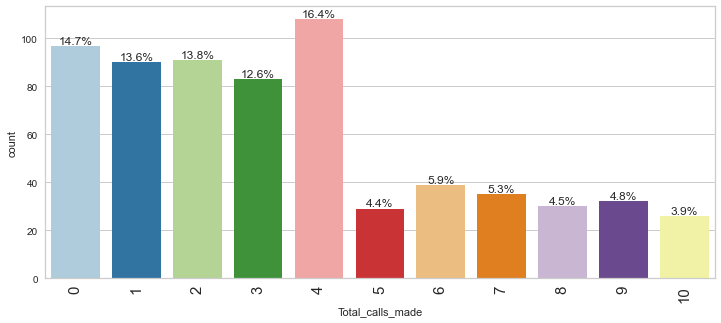

In [73]:
labeled_barplot(df, "Total_calls_made", perc=True)

- Majority of the calls made are between 0 and 4 

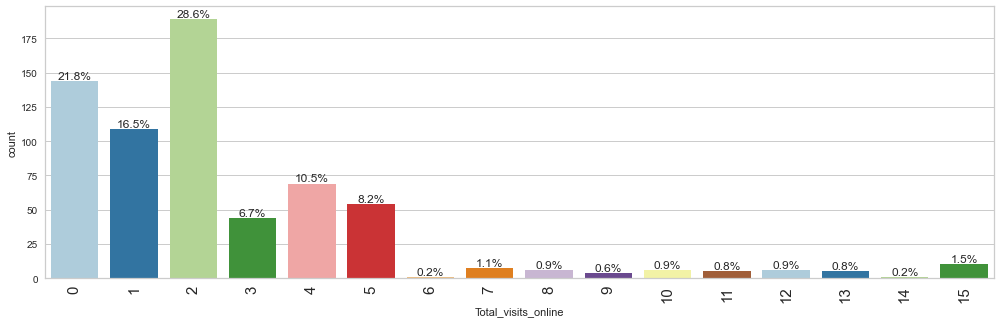

In [74]:
labeled_barplot(df, "Total_visits_online", perc=True)

- Majority of the total visits online are from 0 to 5 times 
- But overall it is a huge range, as 15 times does account for 1.5% of total visits online 

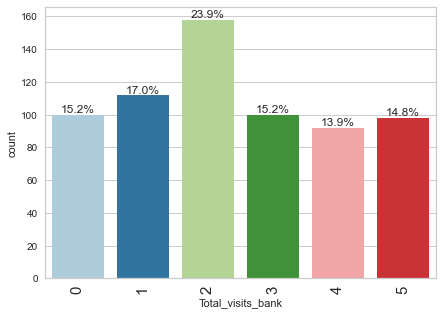

In [75]:
labeled_barplot(df, "Total_visits_bank", perc=True)

- Quite balanaced in terms of distributions, though 2 visits to the bank in total make up the largest proportion 

In [76]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

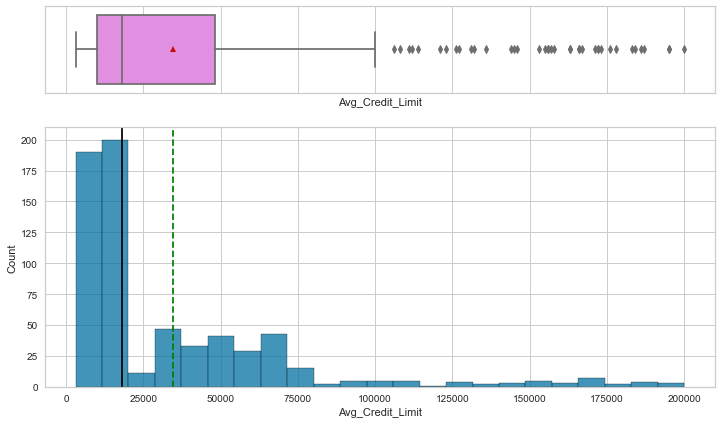

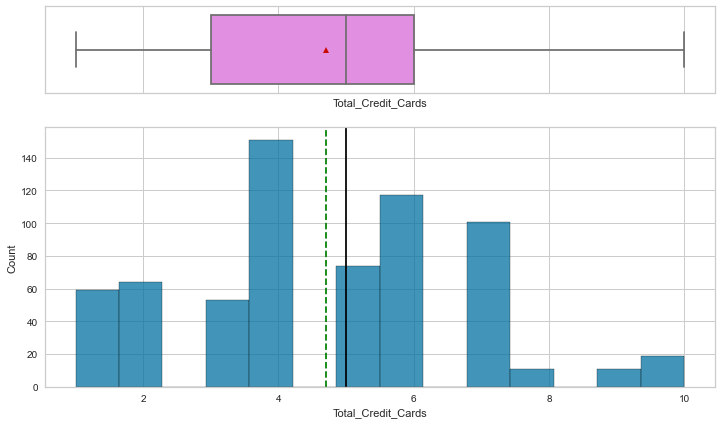

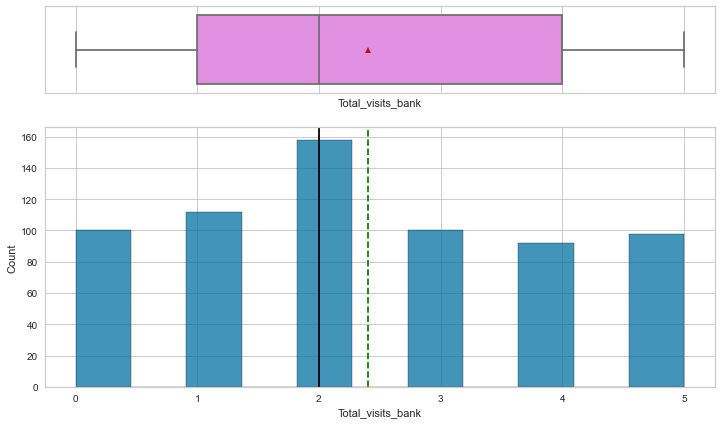

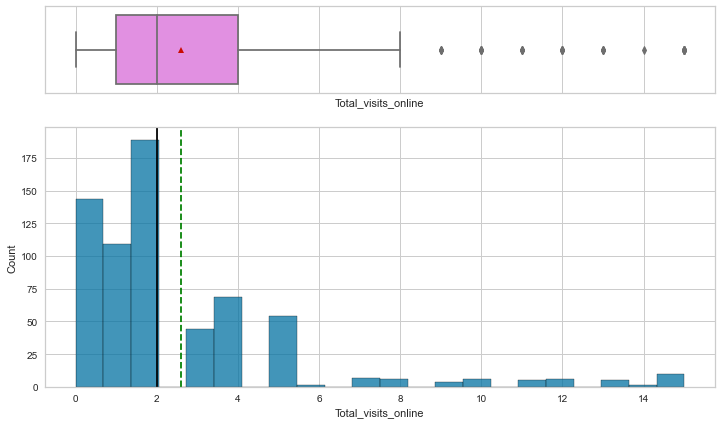

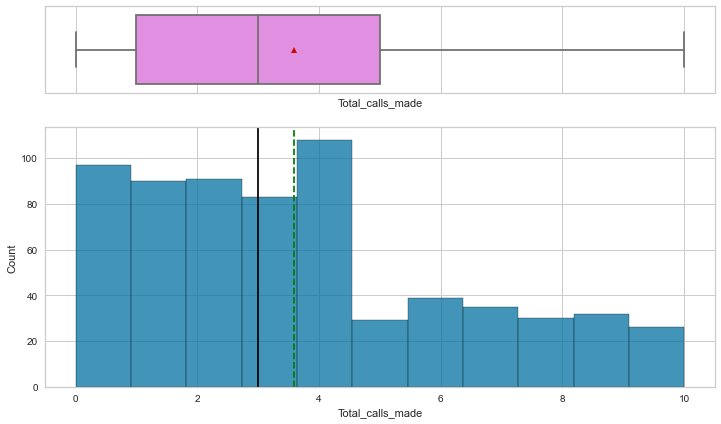

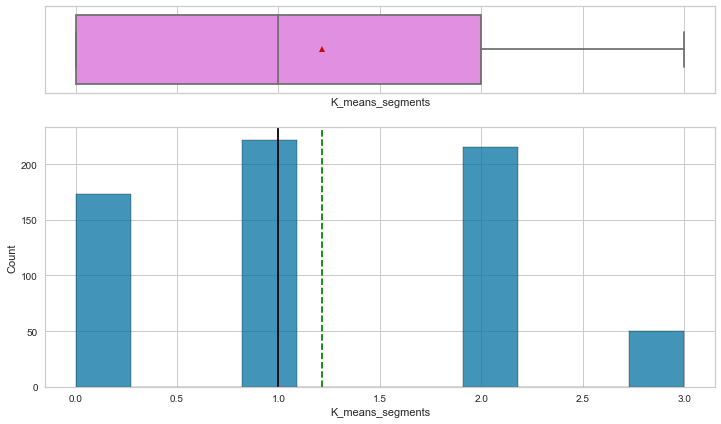

In [77]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)
    

- Normal distributions: total credit cards 
- Skewed to the left: total visits to the bank, total calls made 
- Skewed to the right: average credit limit, total visits online

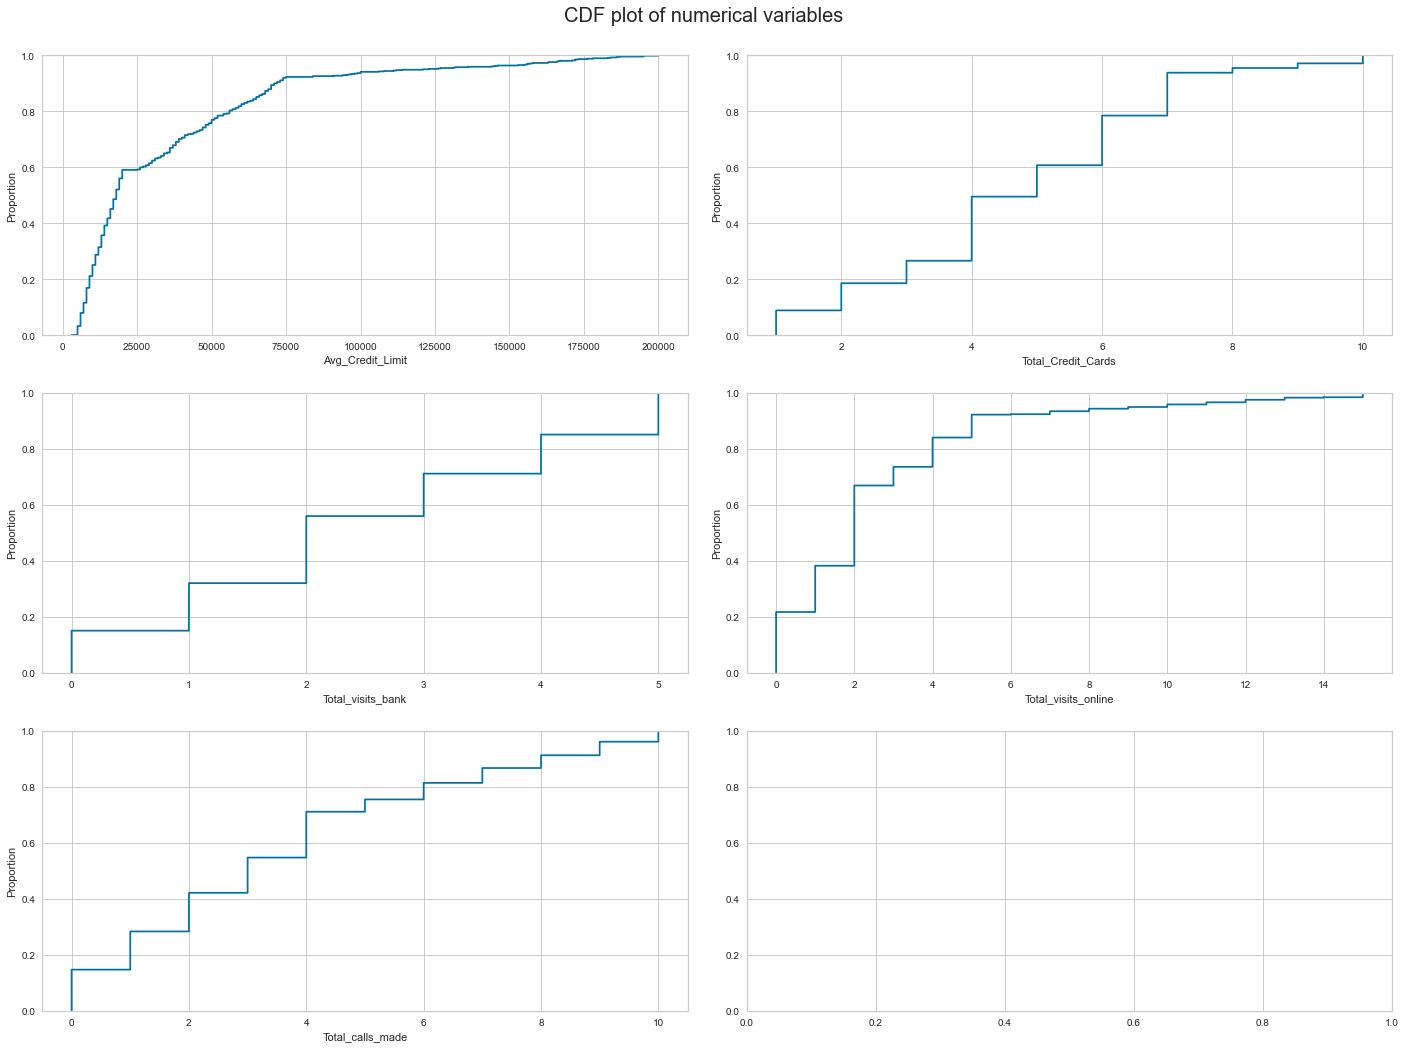

In [78]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

## Bivariate EDA

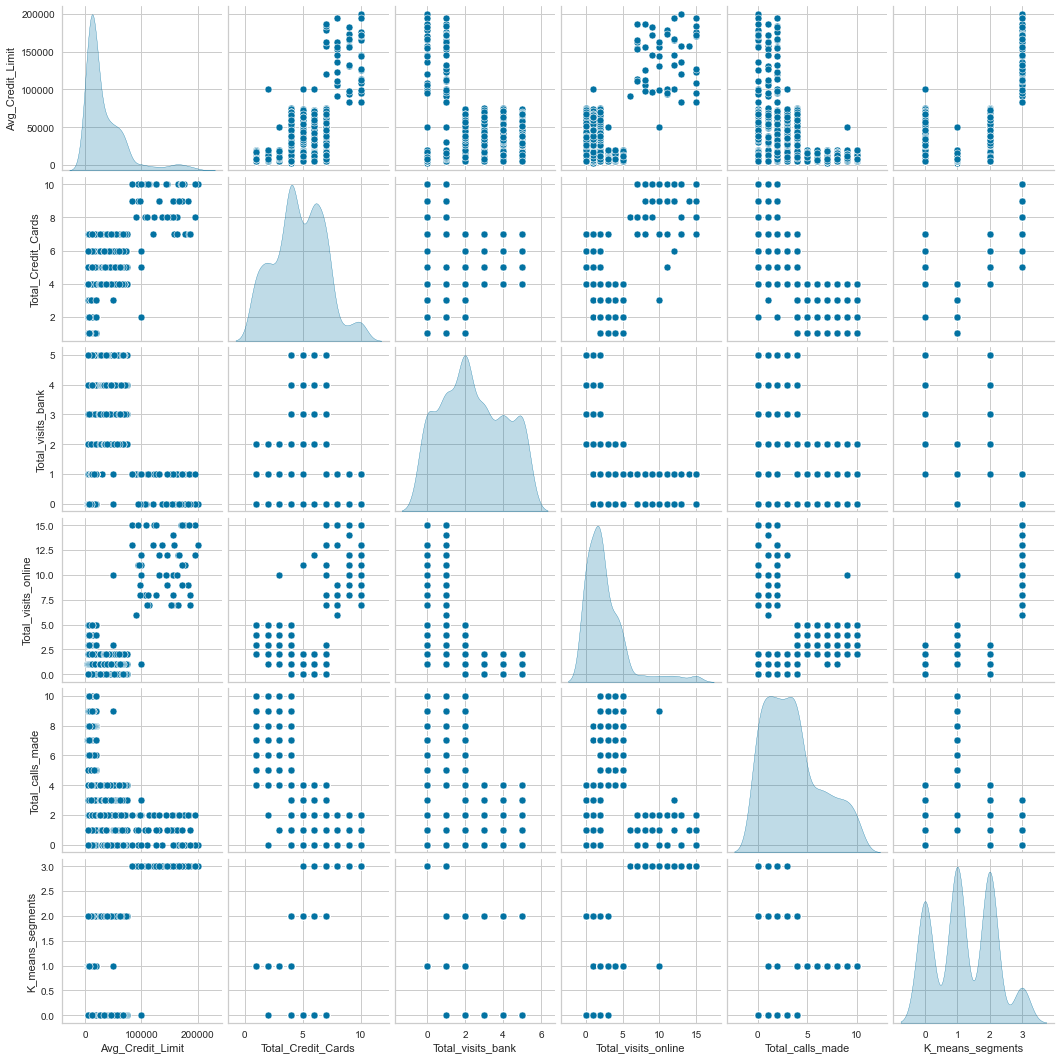

In [79]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

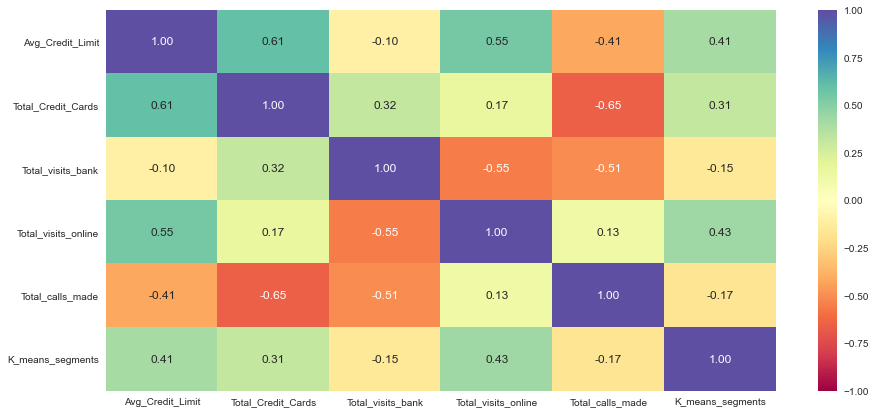

In [80]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- No two variables are strongly correlated 

## Scaling 

In [81]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [82]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

Number of Clusters: 1 	Average Distortion: 2.2474529859574925
Number of Clusters: 2 	Average Distortion: 1.9292197943233718
Number of Clusters: 3 	Average Distortion: 1.4007463800265778
Number of Clusters: 4 	Average Distortion: 1.1440870330043968
Number of Clusters: 5 	Average Distortion: 1.0877288442122657
Number of Clusters: 6 	Average Distortion: 1.0322239932064807
Number of Clusters: 7 	Average Distortion: 0.9875792680976527
Number of Clusters: 8 	Average Distortion: 0.9621093267111345


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

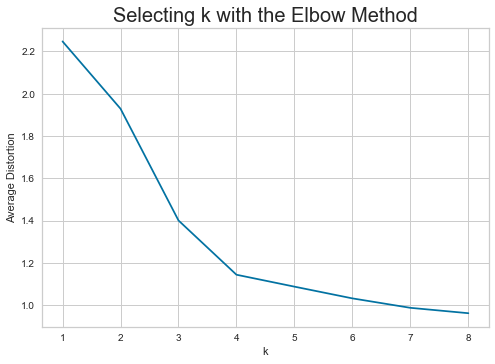

In [83]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

For n_clusters = 2, silhouette score is 0.5542377080324126
For n_clusters = 3, silhouette score is 0.4495242296193787
For n_clusters = 4, silhouette score is 0.4761404934987409
For n_clusters = 5, silhouette score is 0.4011200779455583
For n_clusters = 6, silhouette score is 0.3078125662637037
For n_clusters = 7, silhouette score is 0.274841828014638
For n_clusters = 8, silhouette score is 0.2513636760108919
For n_clusters = 9, silhouette score is 0.24150787298958823


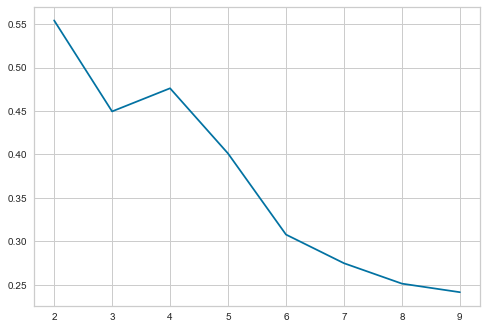

In [84]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

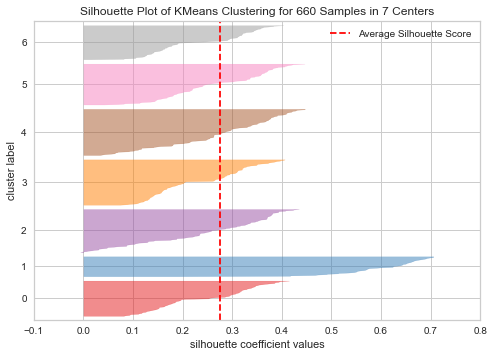

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [85]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

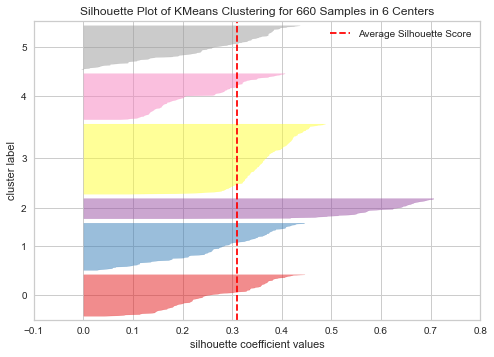

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [86]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

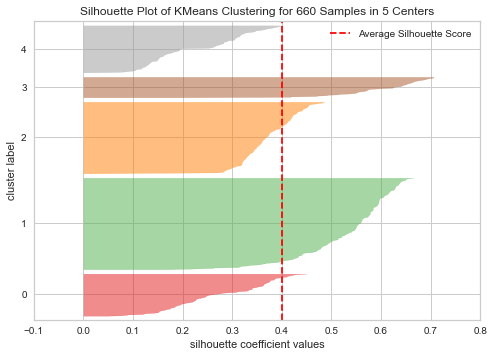

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

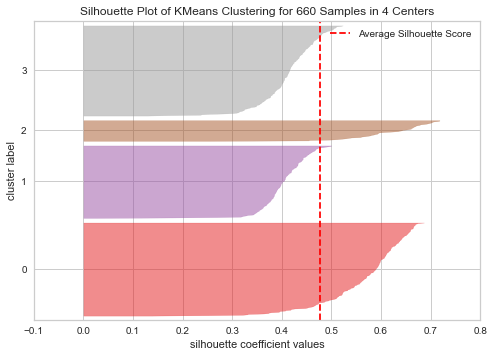

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [88]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [89]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [90]:
df["K_means_segments"] = kmeans.labels_

In [91]:
cluster_profile = df.groupby("K_means_segments").mean()

In [67]:
cluster_profile["count_in_each_segment"] = (
    df.groupby("K_means_segments")["Customer Key"].count().values
)

In [92]:
cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,30562.790698,5.446512,3.455814,1.018605,2.060465
1,12180.180180,2.396396,0.923423,3.563063,6.896396
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,37526.011561,5.583815,3.514451,0.953757,1.947977


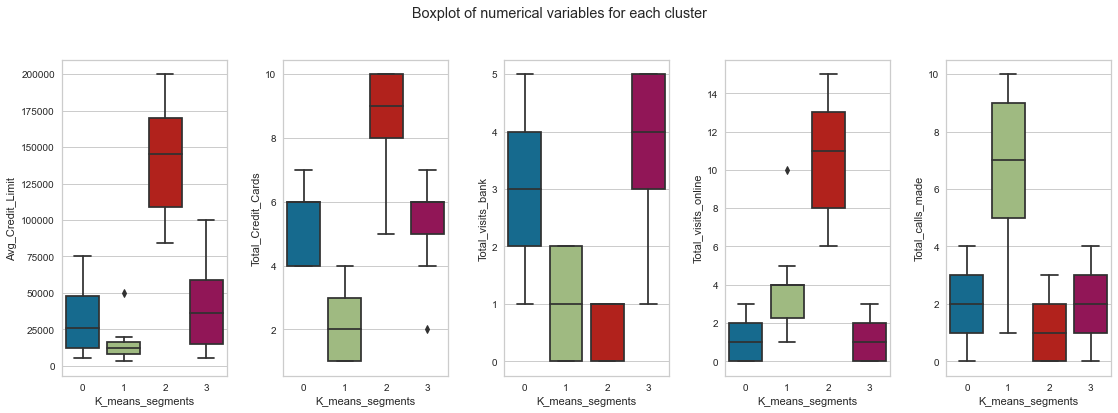

In [93]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

<AxesSubplot:xlabel='K_means_segments'>

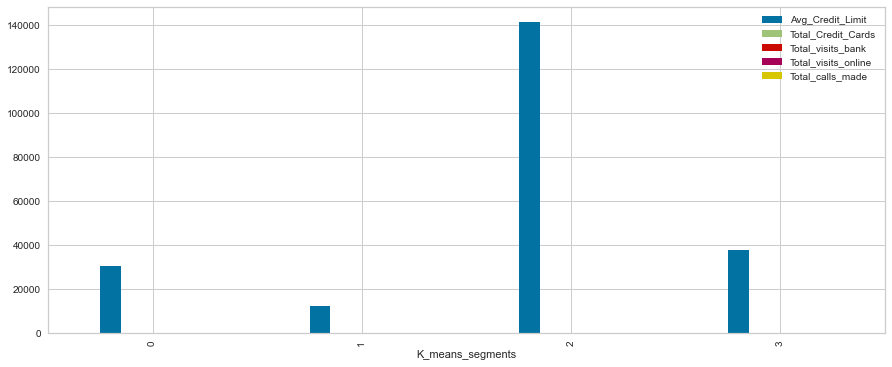

In [94]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

### Insights from K-Means Clustering 

- **Clusters 0**:
    - Avg credit limit is slightly less than $40000


- **Cluster 1**:
    - Avg credit limit is slightly above $11000 


- **Cluster 2**:
    - Avg credit limit is above $30000
    
    
- **Cluster 3**:
    - Avg credit limit is above $140000

- K means clustering is only providing clusters based on average credit limit 
- Thus trying on hierachical clustering to see which method performs better 

### Scaling 

In [96]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Avg_Credit_Limit"], axis=1)),
    columns=df.drop(["Avg_Credit_Limit"], axis=1).columns,
)
subset_scaled_df.head()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments
0,-1.249225,-0.860451,-0.547490,-1.251537,1.471843
1,-0.787585,-1.473731,2.520519,1.891859,-0.233892
2,1.058973,-0.860451,0.134290,0.145528,-1.086760
3,0.135694,-0.860451,-0.547490,0.145528,-1.086760
4,0.597334,-1.473731,3.202298,-0.203739,0.618975


## Hierarchical Clustering

In [97]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7323386260616493.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8400436617581626.
Cophenetic correlation for Euclidean distance and average linkage is 0.8708779287421571.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8610251751913351.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7190784915351494.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8357008375705306.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8584087019289341.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8313680485757518.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7468253852613892.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4474119205668068.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.830084442986023.
Cophenetic cor

In [98]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8708779287421571, which is obtained with Euclidean distance and average linkage.


In [99]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7323386260616493.
Cophenetic correlation for complete linkage is 0.8400436617581626.
Cophenetic correlation for average linkage is 0.8708779287421571.
Cophenetic correlation for centroid linkage is 0.8687890735562503.
Cophenetic correlation for ward linkage is 0.7733121833338092.
Cophenetic correlation for weighted linkage is 0.8610251751913351.


In [100]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8708779287421571, which is obtained with average linkage.


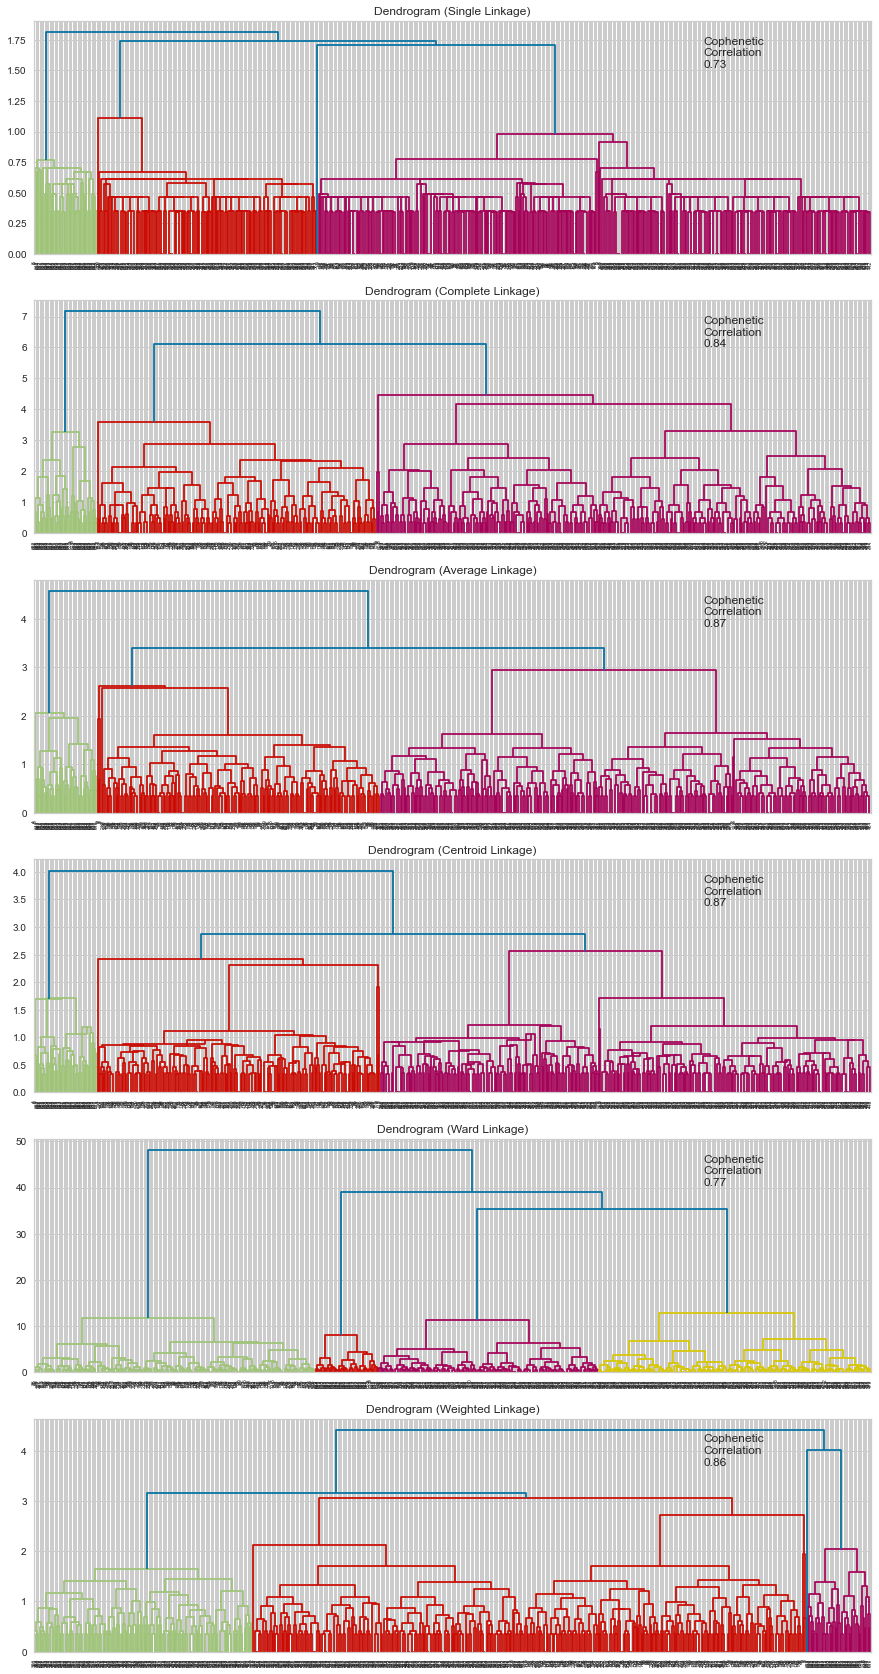

In [101]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

## Cluster Profiling 

In [102]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [103]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [104]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [105]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Total_Credit_Cards"].count().values
)

In [107]:
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following Total_visits_bank are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 1, the following Total_visits_bank are present:
[1 0]

In cluster 5, the following Total_visits_bank are present:
[0]

In cluster 2, the following Total_visits_bank are present:
[1 2 5 4 3]

In cluster 0, the following Total_visits_bank are present:
[0 1]

In cluster 4, the following Total_visits_bank are present:
[0 2 1]

In cluster 3, the following Total_visits_bank are present:
[2 3 4 5]



In [108]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [109]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [111]:
cluster_profile = df.groupby("HC_Clusters").mean()

In [112]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Total_visits_bank"].count().values
)

In [113]:
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following Total_visits_bank are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 1, the following Total_visits_bank are present:
[1 0 2 3]

In cluster 0, the following Total_visits_bank are present:
[0 2 1]

In cluster 2, the following Total_visits_bank are present:
[0 1]

In cluster 5, the following Total_visits_bank are present:
[2 3]

In cluster 4, the following Total_visits_bank are present:
[5 4]

In cluster 3, the following Total_visits_bank are present:
[4 5 3]



In [114]:
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12200.000000,2.395455,0.931818,3.581818,6.945455,1.000000,220
1,33422.413793,5.405172,2.439655,1.017241,2.086207,0.043103,116
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
3,35637.362637,5.516484,4.461538,0.956044,1.835165,3.000000,91
4,27588.235294,5.401961,4.519608,1.029412,2.000000,0.000000,102
5,38876.543210,5.703704,2.481481,0.950617,2.098765,3.000000,81


## PCA for Dimensionality Reduction

In [115]:
subset_scaled_df2 = subset_scaled_df.drop("HC_Clusters", axis=1).copy()

In [116]:
pca = PCA()
pca.fit(subset_scaled_df2)

PCA()

In [117]:
pca.explained_variance_ratio_

array([0.4228575 , 0.2821084 , 0.17656164, 0.06400162, 0.05447084])

In [118]:
pca = PCA(
    0.9, svd_solver="full"
)  # svd_solver=full helps in faster convergence in case of very large data set
pca.fit(subset_scaled_df2)

PCA(n_components=0.9, svd_solver='full')

In [119]:
pca.explained_variance_ratio_

array([0.4228575 , 0.2821084 , 0.17656164, 0.06400162])

In [120]:
subset_pca = pca.transform(subset_scaled_df2)
subset_pca_df = pd.DataFrame(subset_pca)

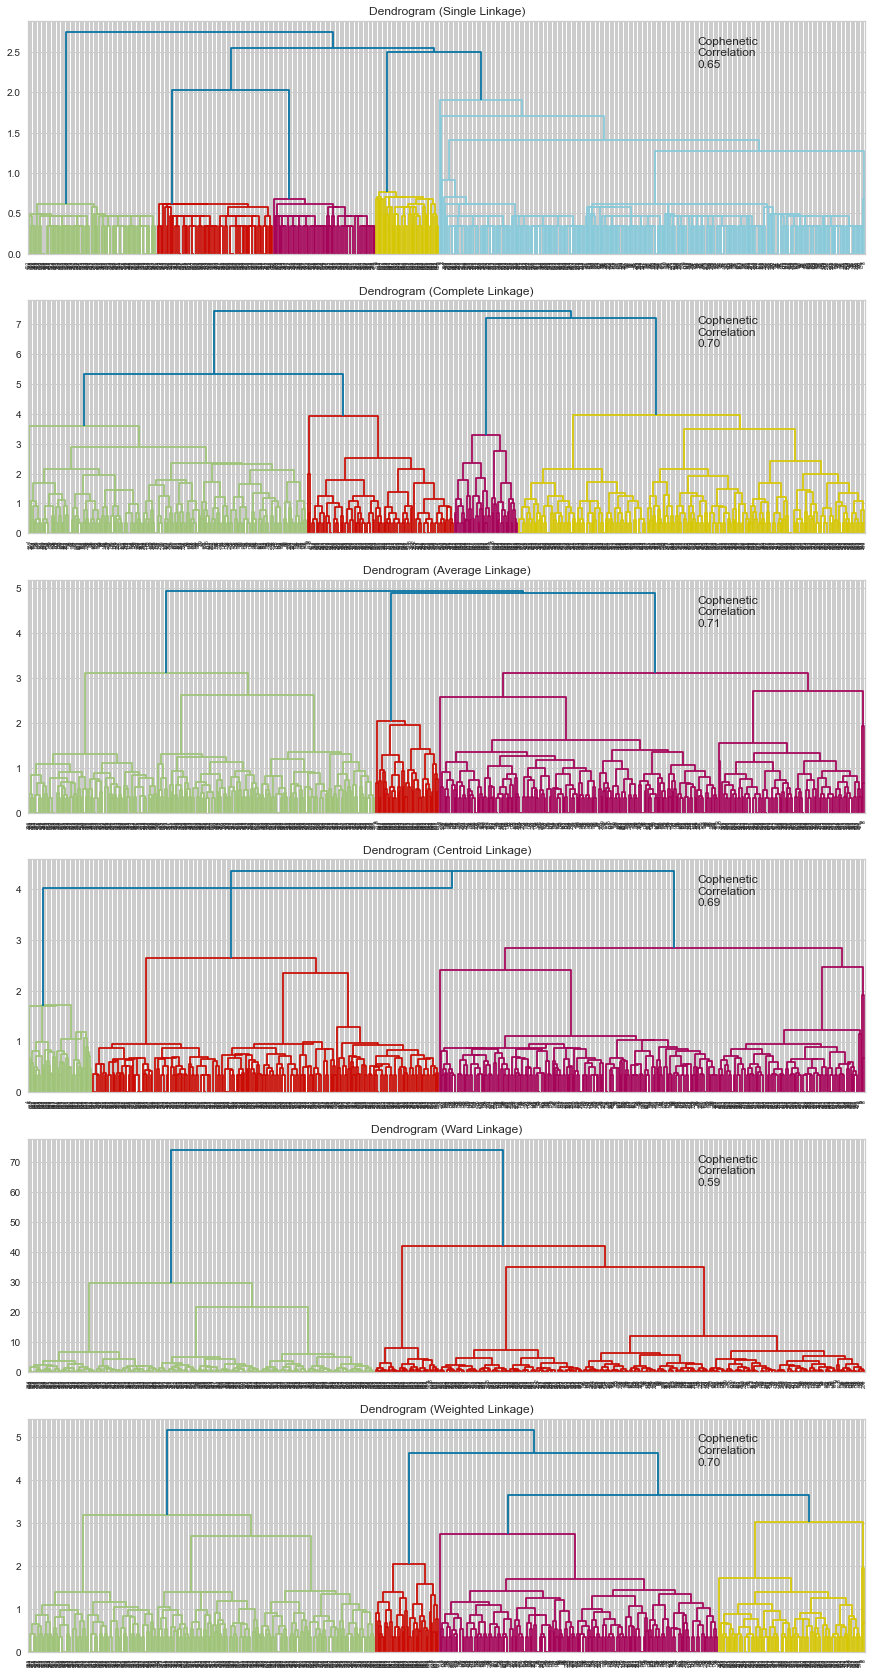

In [121]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_pca_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [122]:
hc = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
hc_labels = hc.fit_predict(subset_pca)

In [124]:
# adding hierarchical cluster labels to the original dataframe
df2 = df.drop(["HC_Clusters"], axis=1)
df2["PCA_HC_Clusters"] = hc_labels

In [126]:
cluster_profile2 = df2.groupby("PCA_HC_Clusters").mean()
cluster_profile2["count_in_each_segments"] = (
    df2.groupby("PCA_HC_Clusters")["Total_visits_bank"].count().values
)

In [128]:
# let's see the names of the countries in each cluster
for cl in df2["PCA_HC_Clusters"].unique():
    print("In cluster {}, Total_visits_bank:".format(cl))
    print(df2[df2["PCA_HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print()

In cluster 0, Total_visits_bank:
[1 2 3 4 5]

In cluster 4, Total_visits_bank:
[0 2 1]

In cluster 1, Total_visits_bank:
[1 2 3 4]

In cluster 2, Total_visits_bank:
[0 1]

In cluster 3, Total_visits_bank:
[0 1 2]

In cluster 5, Total_visits_bank:
[5 4 3]



In [129]:
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
PCA_HC_Clusters,,,,,,,
0,37526.011561,5.583815,3.514451,0.953757,1.947977,3,173
1,32780.487805,5.325203,2.634146,1.065041,2.113821,0,123
2,141040.000000,8.740000,0.600000,10.900000,1.080000,2,50
3,12042.553191,2.468085,0.893617,3.340426,5.695035,1,141
4,12419.753086,2.271605,0.975309,3.950617,8.987654,1,81
5,27597.826087,5.608696,4.554348,0.956522,1.989130,0,92


### Insights from Hierachical Clustering

In cluster 0, Total_visits_bank:
[1 2 3 4 5]

In cluster 4, Total_visits_bank:
[0 2 1]

In cluster 1, Total_visits_bank:
[1 2 3 4]

In cluster 2, Total_visits_bank:
[0 1]

In cluster 3, Total_visits_bank:
[0 1 2]

In cluster 5, Total_visits_bank:
[5 4 3]

## Business Recommendations 

- Customers are clustered based on total credit cards they have, and how they make connections with the bank
- Customers have 3 ways they engage with the bank
- There are some that pay visits to the bank, or call, but there are others that make calls 
- Bank should note that there are customers that do not engage with the bank, and they may still not use the services 
- In general, hierachical clustering works better than k means than identifying the correct clusters 
